In [ ]:
!pip install plotly

In [ ]:
import json
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math
#import sklearn as sk
from sklearn.model_selection import train_test_split
import functools
import plotly.express as px
#import plotly.io as pio
#pio.renderers.default = 'browser'

Importing json file

In [ ]:
file_name = "bangladesh_geojson_adm2_64_districts_zillas.json"
#io.StringIO[file_name].decode("utf-8")
df=pd.read_json(io.StringIO(uploaded['bangladesh_geojson_adm2_64_districts_zillas.json'].decode('utf-8')))

In [ ]:
bd=json.loads(uploaded[file_name].decode("utf-8"))

In [ ]:
bd['features'][50]['properties']

{'Shape_Leng': 9.7319831232,
 'Shape_Area': 0.229213667568,
 'ADM2_EN': 'Patuakhali',
 'ADM2_PCODE': 'BD1078',
 'ADM2_REF': None,
 'ADM2ALT1EN': None,
 'ADM2ALT2EN': None,
 'ADM1_EN': 'Barisal',
 'ADM1_PCODE': 'BD10',
 'ADM0_EN': 'Bangladesh',
 'ADM0_PCODE': 'BD',
 'date': '2015/01/01',
 'validOn': '2020/11/13',
 'ValidTo': None}

importing csv file

In [ ]:
data=files.upload()

Saving test_data_set.csv to test_data_set.csv


In [ ]:
df=pd.read_csv(io.StringIO(data['test_data_set.csv'].decode('utf-8')))

In [ ]:
df.head()

,UniqueID,year,month,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Hospital Duration,organism,serotype
0,1100146118,2014,Feb,2-Feb-14,11,Meningitis,Dhaka,NaN,Discharge,20-Feb-14,18,Streptococcus pneumoniae,NTD
1,1100045118,2014,Feb,6-Feb-14,133,Meningitis,Dhaka,NaN,Discharge,19-Feb-14,13,Streptococcus pneumoniae,QNS
2,1100095118,2014,Feb,7-Feb-14,4,Very sever disease,Narsingdi,NaN,Discharge,17-Feb-14,10,Streptococcus pneumoniae,7F
3,1100096118,2014,Feb,9-Feb-14,4,Meningitis,Gazipur,NaN,Discharge,18-Feb-14,9,Streptococcus pneumoniae,7A/F
4,1100010105,2014,Mar,4-Mar-14,4,Meningitis,Gazipur,NaN,Discharge,13-Mar-14,9,Streptococcus pneumoniae,5


In [ ]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)

In [ ]:
df.drop(columns=['Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Outcome','Discharge Date','organism','year','serotype'],inplace=True)

In [ ]:
df

,Zila,Hospital Duration
0,Dhaka,18
2,Narsingdi,10
3,Gazipur,9
4,Gazipur,9
6,Netrakona,14
7,Narayanganj,13
8,Comilla,11
9,Dhaka,8
10,Munshiganj,8
11,Tangail,18


In [ ]:
bd['features'][50]['properties']
state_id_map = {}
for feature in bd["features"]:
    feature["id"] = feature["properties"]["ADM2_PCODE"]
    state_id_map[feature["properties"]["ADM2_EN"]] = feature["id"]

In [ ]:
df["id"] = df["Zila"].apply(lambda x: state_id_map[x])

In [ ]:
df.head()

,Zila,Hospital Duration,id
0,Dhaka,18,BD3026
2,Narsingdi,10,BD3068
3,Gazipur,9,BD3033
4,Gazipur,9,BD3033
6,Netrakona,14,BD4572


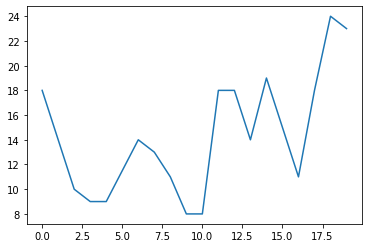

In [ ]:
df["Hospital Duration"].plot()

In [ ]:
df["DensityScale"] = np.log10(df["Hospital Duration"])
df["DensityScale"].plot()

In [ ]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=bd,
    color="Hospital Duration",
    hover_name="Zila",
    hover_data=["Hospital Duration"],
    title="blah blah blah",
)
fig.update_geos(fitbounds="locations", visible=False)
#fig.show()
fig.show(renderer="colab")

Error: ignored